# Tests on PandaPower

In [7]:
import pandas as pd
import pandapower as pp
import numpy as np
from pandapower.networks import mv_oberrhein
import pandapower.plotting as plot
from pandapower.plotting.plotly import simple_plotly
import re
from decimal import Decimal
from pandapower.networks import mv_oberrhein
import os

## Importation prod éolienne : définition des fonctions

In [2]:
if os.getcwd()[:10] == '/Users/flo':
    path = '/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/wind/outputs'
else:
    path = 'C:/Users/sebsa/Documents/Centrale Paris/3A/OEN/Projet Synthese/data/installed_capacity/Wind/Extraction The Wind Power'
wind_farms = os.listdir(path)
wind_farms

['database_GR.csv',
 'database_PL.csv',
 'database_DK.csv',
 '.DS_Store',
 'database_GB.csv',
 'database_SE.csv',
 'database_FR.csv',
 'database_CY.csv',
 'Untitled.ipynb',
 'database_LV.csv',
 'database_CZ.csv',
 'database_LU.csv',
 'Other',
 'database_CH.csv',
 'database_NO.csv',
 'database_AT.csv',
 'database_NL.csv',
 'database_BE.csv',
 'database_MK.csv',
 'database_BG.csv',
 'database_ES.csv',
 '.ipynb_checkpoints',
 'database_SI.csv',
 'database_HU.csv',
 'database_FI.csv',
 'database_EE.csv',
 'database_RO.csv',
 'database_SK.csv',
 'database_IE.csv',
 'database_HR.csv',
 'database_PT.csv',
 'database_DE.csv',
 'database_IT.csv']

In [3]:
test = pd.read_csv(path+'/'+wind_farms[2], sep = ';', encoding = "ISO-8859-1")

In [4]:
test

,Wind farm name,Total nominal power,Latitude,Longitude
0,Aalborg,750 kW,"57Â° 2' 50.1""","9Â° 55' 21.7"""
1,Abild,600 kW,"54Â° 58' 51.8""","8Â° 51' 40.8"""
2,Abildgard,600 kW,"55Â° 49' 44.5""","12Â° 4' 27.2"""
3,Abol,600 kW,"54Â° 54' 35.9""","9Â° 5' 52.5"""
4,Abterp,"1,320 kW","55Â° 4' 38.6""","8Â° 45' 46.5"""
5,Aby,600 kW,NaN,NaN
6,Adbol,225 kW,"56Â° 46' 25.4""","8Â° 21' 9.5"""
7,Adum-Kirkeby,"24,000 kW","55Â° 56' 44.3""","8Â° 29' 37.1"""
8,Aeble,750 kW,"55Â° 15' 59.2""","10Â° 41' 2"""
9,Aflandshage,"200,000 kW","55Â° 31' 12""","12Â° 32' 23.9"""


In [5]:
test['Latitude'] = test['Latitude'].str.replace('å¡','°')
test['Longitude'] = test['Longitude'].str.replace('å¡','°')
test['Latitude'] = test['Latitude'].str.replace('Â°','°')
test['Longitude'] = test['Longitude'].str.replace('Â°','°')
test

,Wind farm name,Total nominal power,Latitude,Longitude
0,Aalborg,750 kW,"57° 2' 50.1""","9° 55' 21.7"""
1,Abild,600 kW,"54° 58' 51.8""","8° 51' 40.8"""
2,Abildgard,600 kW,"55° 49' 44.5""","12° 4' 27.2"""
3,Abol,600 kW,"54° 54' 35.9""","9° 5' 52.5"""
4,Abterp,"1,320 kW","55° 4' 38.6""","8° 45' 46.5"""
5,Aby,600 kW,NaN,NaN
6,Adbol,225 kW,"56° 46' 25.4""","8° 21' 9.5"""
7,Adum-Kirkeby,"24,000 kW","55° 56' 44.3""","8° 29' 37.1"""
8,Aeble,750 kW,"55° 15' 59.2""","10° 41' 2"""
9,Aflandshage,"200,000 kW","55° 31' 12""","12° 32' 23.9"""


In [28]:
def formatlist(degrees):
    degrees = re.split('°|\' ',degrees)
    degrees[-1] = degrees[-1].replace('"',"")
    degrees = [float(x) for x in degrees]
    return degrees

def decimalDegree(degrees):
    degree, minute, second = degrees[0], degrees[1], degrees[2]
    return degree + (minute + second/60.)/60.

In [45]:
test['Latitude'] = test['Latitude'].astype(str)
test['Longitude'] = test['Longitude'].astype(str)
test['Longitude'] = test['Longitude'].apply(lambda row: formatlist(row))
test['Latitude'] = test['Latitude'].apply(lambda row: formatlist(row))
test['longlat'] = test['Latitude'].apply (lambda row: len(row))
test['longlong'] = test['Longitude'].apply (lambda row: len(row))
test = test.loc[test['longlat'] == 3]

In [46]:
test['Longitude'] = test['Longitude'].apply(lambda row: decimalDegree(row))
test['Latitude'] = test['Latitude'].apply(lambda row: decimalDegree(row))

In [3]:
del test['longlat'], test['longlong']

NameError: name 'test' is not defined

## Test Visualisation

In [32]:
network = pp.create_empty_network()

In [33]:
coord1 = (50.050371, 2.978700)[::-1]
coord2 = (49.838145, 2.825777)[::-1]
coord3 = (48.868504, 2.441685)[::-1]
coord4 = (49.218184, 4.078610)[::-1]
coord5 = (42.522918, 3.036108)[::-1]
coord6 = (45.912394, 6.869214)[::-1]
coord7 = (43.693737, 7.246635)[::-1]
coord8 = (43.407901, -1.515821)[::-1]

In [34]:
bus1 = pp.create_bus(network, name=test["Wind farm name"][0], vn_kv=110, type="b", geodata = coord1)
bus2 = pp.create_bus(network, name=test["Wind farm name"][1], vn_kv=110, type="b", geodata = coord2)
bus3 = pp.create_bus(network, name='Paname', vn_kv=110, type="b", geodata = coord3)
bus4 = pp.create_bus(network, name='Reims', vn_kv=110, type="b", geodata = coord4)
bus5 = pp.create_bus(network, name='Perpi', vn_kv=110, type="b", geodata = coord5)
bus6 = pp.create_bus(network, name='Cham', vn_kv=110, type="b", geodata = coord6)
bus7 = pp.create_bus(network, name='Nice', vn_kv=110, type="b", geodata = coord7)
bus8 = pp.create_bus(network, name='Biarritz', vn_kv=110, type="b", geodata = coord8)
network.bus

,name,vn_kv,type,zone,in_service
0,Accadia,110.0,b,None,True
1,Acqua Spruzza,110.0,b,None,True
2,Paname,110.0,b,None,True
3,Reims,110.0,b,None,True
4,Perpi,110.0,b,None,True
5,Cham,110.0,b,None,True
6,Nice,110.0,b,None,True
7,Biarritz,110.0,b,None,True


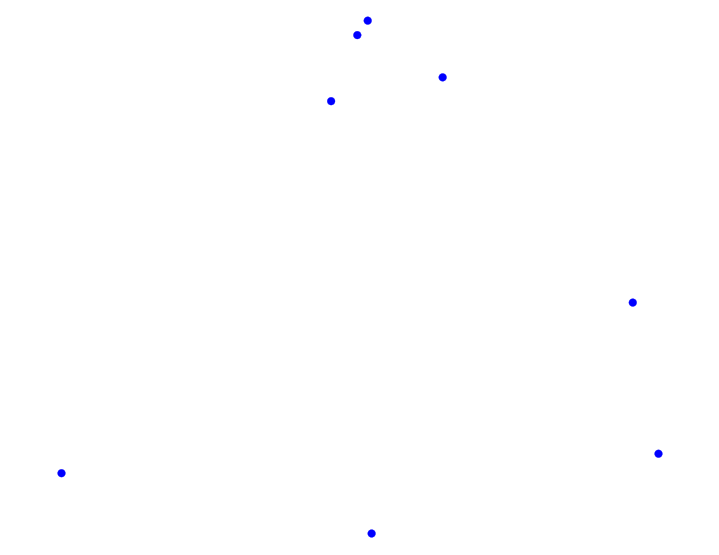

In [35]:
plot.simple_plot(network, bus_size=0.7)

## Importation multiple des parcs : exemple du Danemark

In [47]:
test['Total nominal power'] = test['Total nominal power'].astype(str).str.extract('(\d+)').astype(float)
test.loc[test['Total nominal power'] >= 10]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,Wind farm name,Total nominal power,Latitude,Longitude,longlat,longlong
0,Aalborg,750.0,57.047250,9.922694,3,3
1,Abild,600.0,54.981056,8.861333,3,3
2,Abildgard,600.0,55.829028,12.074222,3,3
3,Abol,600.0,54.909972,9.097917,3,3
6,Adbol,225.0,56.773722,8.352639,3,3
7,Adum-Kirkeby,24.0,55.945639,8.493639,3,3
8,Aeble,750.0,55.266444,10.683889,3,3
9,Aflandshage,200.0,55.520000,12.539972,3,3
11,AgernÃ¦s,600.0,55.590417,10.341833,3,3
12,Agerskov,600.0,56.262944,9.144556,3,3


In [48]:
windfarmsnames = test['Wind farm name'].tolist()

In [52]:
farms = {}
for x in windfarmsnames:
    line_to_enter = test.loc[test['Wind farm name'] == x]
    farms[x] = [line_to_enter['Total nominal power'].item(), line_to_enter['Latitude'].item(), line_to_enter['Longitude'].item()]

In [53]:
network = pp.create_empty_network()
for x in farms.keys():
    pp.create_bus(network, name=x, vn_kv=110, type="b", geodata = (farms[x][2], (farms[x][1])))

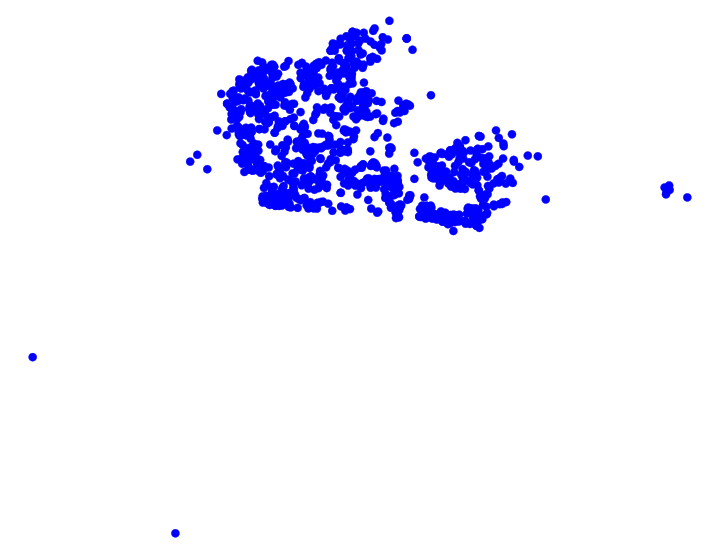

In [59]:
a = plot.simple_plot(network, bus_size=0.7)

## Formatage parcs

In [1]:
if os.getcwd()[:10] == '/Users/flo':
    path = '/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/wind/outputs'
else:
    path = 'C:/Users/sebsa/Documents/Centrale Paris/3A/OEN/Projet Synthese/data/installed_capacity/Wind/Extraction The Wind Power'
wind_farms = os.listdir(path)
wind_farms = [countries for countries in wind_farms if countries[:3] == 'dat'] #get the list of the csvs to concat

NameError: name 'os' is not defined

In [63]:
global_farms = pd.DataFrame
list_ = []
for count in wind_farms:
    inter = pd.read_csv(path + '/' + count,sep = ';', encoding = "ISO-8859-1")
    list_.append(inter)
global_farms = pd.concat(list_) #creates the concated csv

In [65]:
global_farms['Latitude'] = global_farms['Latitude'].str.replace('å¡','°')
global_farms['Longitude'] = global_farms['Longitude'].str.replace('å¡','°')
global_farms['Latitude'] = global_farms['Latitude'].str.replace('Â°','°')
global_farms['Longitude'] = global_farms['Longitude'].str.replace('Â°','°')

In [66]:
global_farms['Total nominal power'] = global_farms['Total nominal power'].str.replace(',','')

In [68]:
global_farms['Total nominal power'] = global_farms['Total nominal power'].astype(str).str.extract('(\d+)').astype(float)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [69]:
global_farms.to_csv(path + 'eufarms_all.csv') #exports the df of all windfarms

In [70]:
global_farms['Latitude'] = global_farms['Latitude'].astype(str)
global_farms['Longitude'] = global_farms['Longitude'].astype(str)
global_farms['Longitude'] = global_farms['Longitude'].apply(lambda row: formatlist(row))
global_farms['Latitude'] = global_farms['Latitude'].apply(lambda row: formatlist(row))
global_farms['longlat'] = global_farms['Latitude'].apply (lambda row: len(row))
global_farms['longlong'] = global_farms['Longitude'].apply (lambda row: len(row))
global_farms_wallgps = global_farms.loc[global_farms['longlat'] == 3]

In [72]:
global_farms_wallgps['Longitude'] = global_farms_wallgps['Longitude'].apply(lambda row: decimalDegree(row))
global_farms_wallgps['Latitude'] = global_farms_wallgps['Latitude'].apply(lambda row: decimalDegree(row))

In [73]:
del global_farms_wallgps['longlat'], global_farms_wallgps['longlong']

In [74]:
global_farms_wallgps.to_csv(path + '/' +'eufarms_withGPS.csv') # exports the df of only windfarms with GPSdata